<a href="https://colab.research.google.com/github/vifilio/sandbox/blob/main/notebooks/colab-github-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Google Colab with GitHub




[Google Colaboratory](http://colab.research.google.com) is designed to integrate cleanly with GitHub, allowing both loading notebooks from github and saving notebooks to github.

## Loading Public Notebooks Directly from GitHub

Colab can load public github notebooks directly, with no required authorization step.

For example, consider the notebook at this address: https://github.com/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb.

The direct colab link to this notebook is: https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb.

To generate such links in one click, you can use the [Open in Colab](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo) Chrome extension.

## Browsing GitHub Repositories from Colab

Colab also supports special URLs that link directly to a GitHub browser for any user/organization, repository, or branch. For example:

- http://colab.research.google.com/github will give you a general github browser, where you can search for any github organization or username.
- http://colab.research.google.com/github/googlecolab/ will open the repository browser for the ``googlecolab`` organization. Replace ``googlecolab`` with any other github org or user to see their repositories.
- http://colab.research.google.com/github/googlecolab/colabtools/ will let you browse the main branch of the ``colabtools`` repository within the ``googlecolab`` organization. Substitute any user/org and repository to see its contents.
- http://colab.research.google.com/github/googlecolab/colabtools/blob/main will let you browse ``main`` branch of the ``colabtools`` repository within the ``googlecolab`` organization. (don't forget the ``blob`` here!) You can specify any valid branch for any valid repository.

## Loading Private Notebooks

Loading a notebook from a private GitHub repository is possible, but requires an additional step to allow Colab to access your files.
Do the following:

1. Navigate to http://colab.research.google.com/github.
2. Click the "Include Private Repos" checkbox.
3. In the popup window, sign-in to your Github account and authorize Colab to read the private files.
4. Your private repositories and notebooks will now be available via the github navigation pane.

## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.

## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.

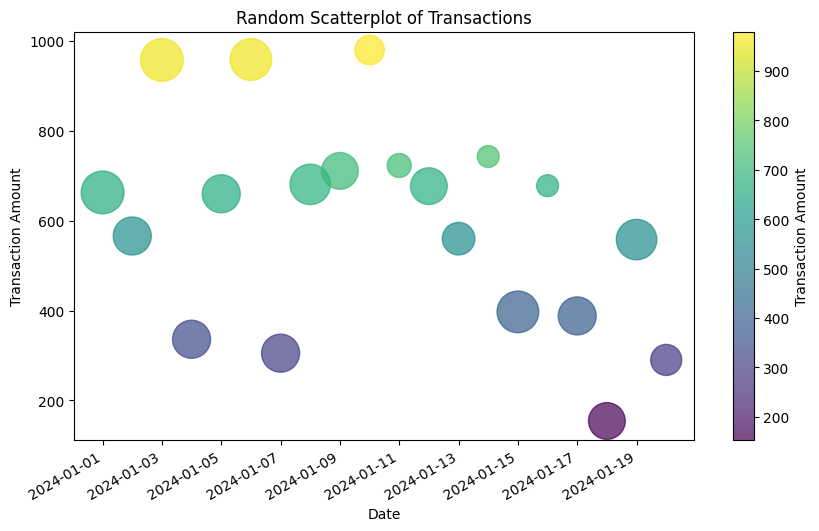

In [4]:
# prompt: generate a random scatterplot with circles representing the number of clustered smaller circles in a larger circle. the x axis to reflect dates and the y axis to reflect the amount of a transaction processed

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import random

# Generate random data
num_points = 20
dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(num_points)]
transactions = np.random.randint(100, 1000, num_points)
cluster_sizes = np.random.randint(5, 20, num_points)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with circle sizes reflecting cluster sizes
scatter = ax.scatter(dates, transactions, s=cluster_sizes * 50, c=transactions, cmap='viridis', alpha=0.7)

# Format the x-axis to show dates
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate() # Rotate date labels for readability

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Transaction Amount')
ax.set_title('Random Scatterplot of Transactions')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Transaction Amount')

# Display the plot
plt.show()

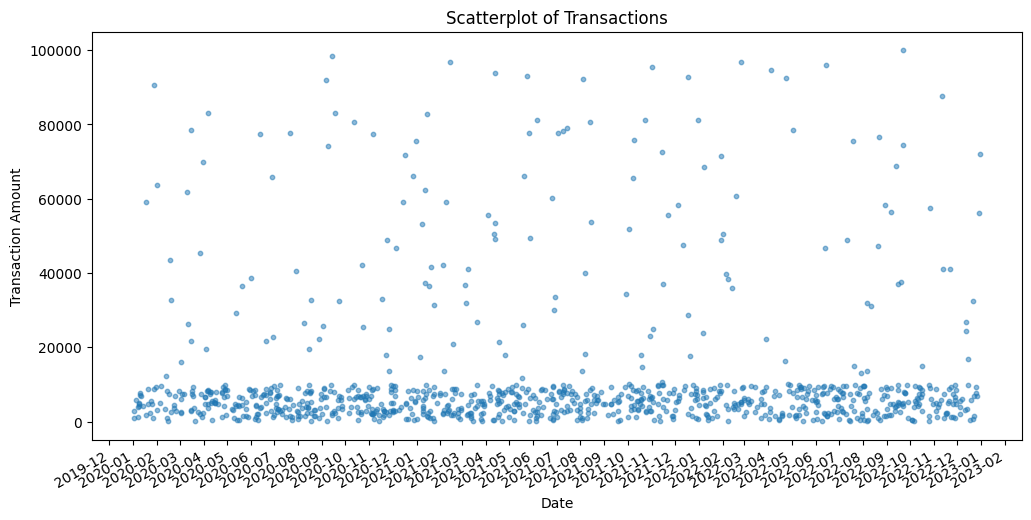

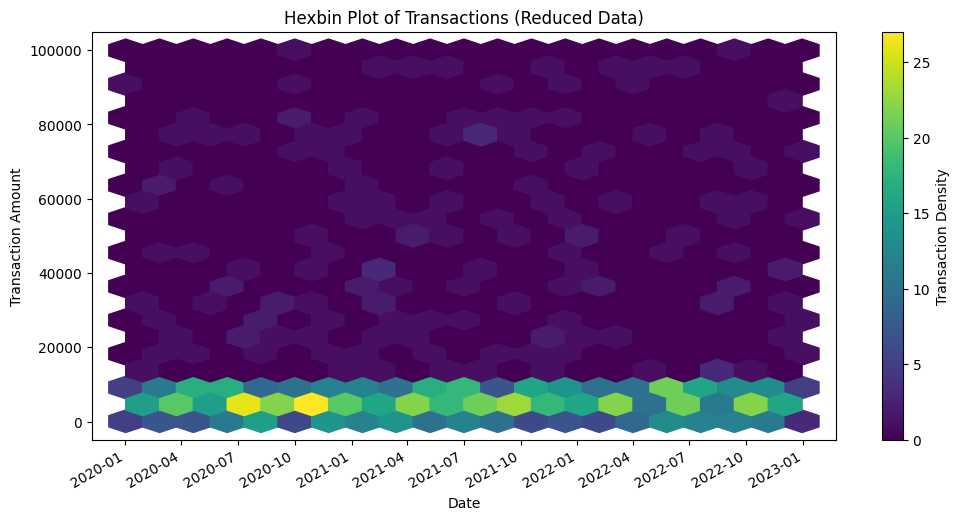

In [22]:
# prompt: generate a scatterplot with 1000 circles where x-axis represents 36 months starting January 2020 and y-axis represents amount between 1 and 100000. show a concentration of more transactions between 100 and 10000. If I could only render 100 data points, how would you represent the scatterplot?

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import random

# Generate 1000 data points
num_points = 1000
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2022, 12, 31)
dates = [start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_points)]
transactions = []
for _ in range(num_points):
    # Concentrate transactions between 100 and 10000
    if random.random() < 0.8:  # 80% chance of being in this range
        transactions.append(random.randint(100, 10000))
    else:
        transactions.append(random.randint(1, 100000))

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(dates, transactions, s=10, alpha=0.5)

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Scatterplot of Transactions')
plt.show()


# If only 100 data points can be rendered, use a hexbin plot or 2D histogram
plt.figure(figsize=(12, 6))
plt.hexbin(mdates.date2num(dates), transactions, gridsize=20, cmap='viridis')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # Show every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Hexbin Plot of Transactions (Reduced Data)')
plt.colorbar(label='Transaction Density')
plt.show()

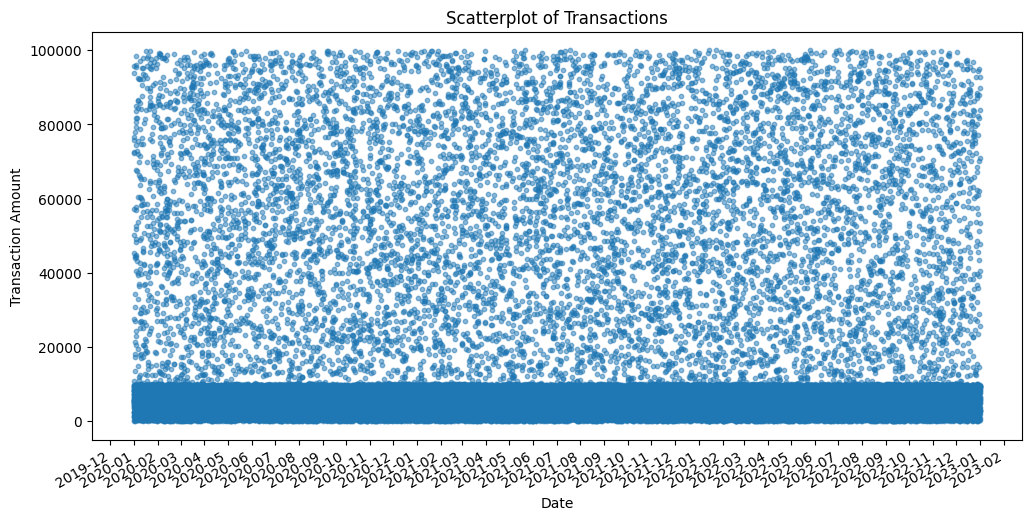

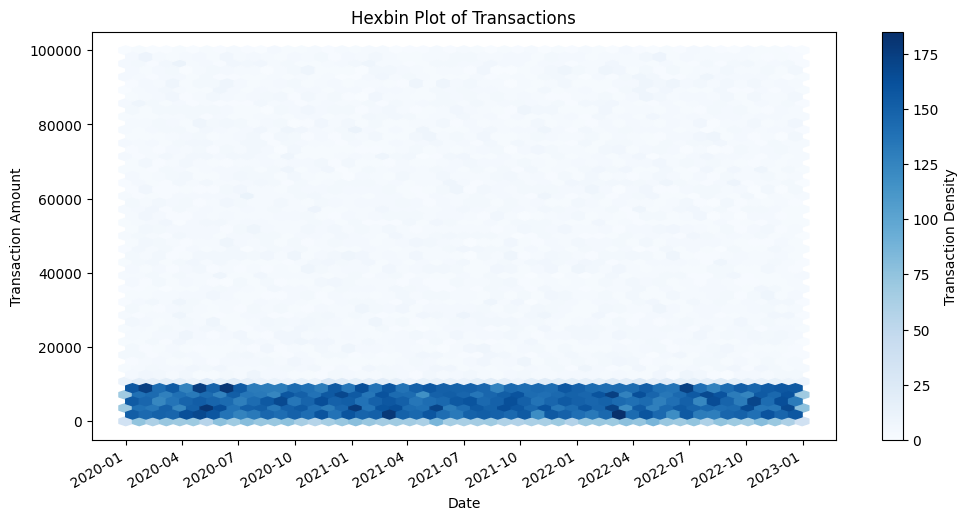

In [49]:
# prompt: generate a scatterplot with 1000 circles where x-axis represents 36 months starting January 2020 and y-axis represents amount between 1 and 100000. show a concentration of more transactions between 100 and 10000 and add some anomalies in different areas. Use a hex bin plot with 20 bins. Show both the scatterplot and the hex bin plot. Use a blue color range for hex bin plots to show density.

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import random

# Generate 1000 data points
num_points = 50000
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2022, 12, 31)
dates = [start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_points)]
transactions = []
for _ in range(num_points):
    # Concentrate transactions between 100 and 10000
    if random.random() < 0.8:  # 80% chance of being in this range
        transactions.append(random.randint(100, 10000))
    else:
        transactions.append(random.randint(1, 100000))

# Add some anomalies
anomalies = [(datetime.date(2020, 3, 15), 90000), (datetime.date(2021, 8, 1), 50000), (datetime.date(2022, 11, 1), 95000)]
dates.extend([date for date, amount in anomalies])
transactions.extend([amount for date, amount in anomalies])


# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(dates, transactions, s=10, alpha=0.5)

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Scatterplot of Transactions')
plt.show()


# Hexbin plot
plt.figure(figsize=(12, 6))
plt.hexbin(mdates.date2num(dates), transactions, gridsize=50, cmap='Blues')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Hexbin Plot of Transactions')
plt.colorbar(label='Transaction Density')
plt.show()